# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

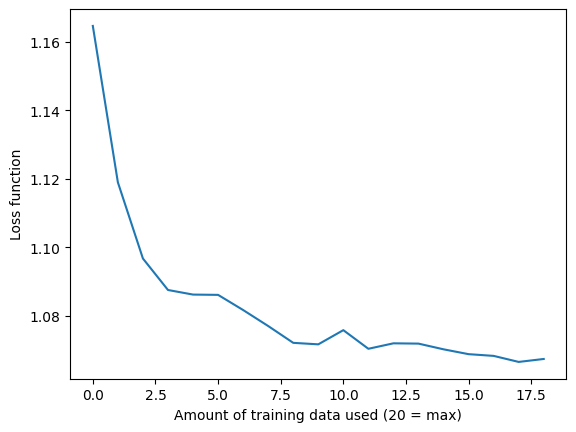

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

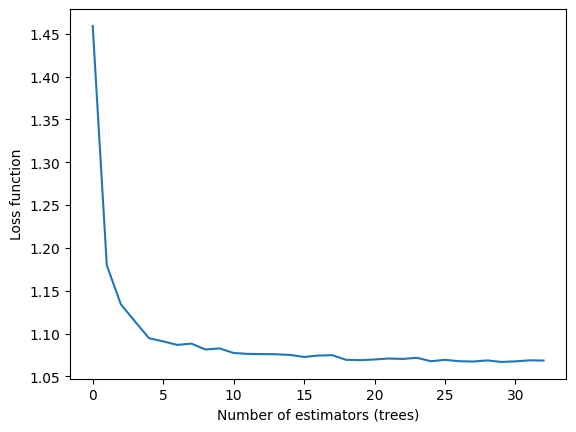

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Colorectal_cancer dataset
df = pd.read_csv("https://raw.githubusercontent.com/muathdb/AI-HW8/refs/heads/main/colorectal_cancer_dataset.csv")

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Drop non-predictive ID column
df_model = df.drop(columns=["Patient_ID"])

# Encode categorical variables
df_encoded = df_model.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Downcast numeric types to reduce memory usage
for col in df_encoded.select_dtypes(include=["int64", "float64"]).columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], downcast="unsigned")

# Split features and target
X = df_encoded.drop(columns=["Survival_Prediction"])
y = df_encoded["Survival_Prediction"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with fewer trees to reduce memory usage
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.5223283582089552
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.40      0.40     13199
           1       0.61      0.60      0.60     20301

    accuracy                           0.52     33500
   macro avg       0.50      0.50      0.50     33500
weighted avg       0.52      0.52      0.52     33500



In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
# Drop the ID column
df_model = df.drop(columns=["Patient_ID"])

# Encode categorical variables
df_encoded = df_model.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Downcast numerical columns to save memory
for col in df_encoded.select_dtypes(include=["int64", "float64"]).columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], downcast="unsigned")

# Separate features and target
X = df_encoded.drop(columns=["Survival_Prediction"])
y = df_encoded["Survival_Prediction"]

# Define a lightweight Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Output results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.52014925 0.52540299 0.52114989 0.52228425 0.52216484]
Mean accuracy: 0.5222302423819289
Standard deviation: 0.0017647195687449753


In [12]:
df_model = df.drop(columns=["Patient_ID"])

# Encode categorical variables
df_encoded = df_model.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Downcast numerical columns
for col in df_encoded.select_dtypes(include=["int64", "float64"]).columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], downcast="unsigned")

# Split features and target
X = df_encoded.drop(columns=["Survival_Prediction"])
y = df_encoded["Survival_Prediction"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model and grid search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy with Best Estimator:", accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test Set Accuracy with Best Estimator: 0.606


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)

df_model = df.drop(columns=["Patient_ID"])

# Encode categorical variables
df_encoded = df_model.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Downcast numerical columns
for col in df_encoded.select_dtypes(include=["int64", "float64"]).columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], downcast="unsigned")

# Split features and target
X = df_encoded.drop(columns=["Survival_Prediction"])
y = df_encoded["Survival_Prediction"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5913731343283583
Precision: 0.6057852297452962
Recall: 0.9325648982808729
F1-Score: 0.7344674412740286
Confusion Matrix:
 [[  879 12320]
 [ 1369 18932]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.07      0.11     13199
           1       0.61      0.93      0.73     20301

    accuracy                           0.59     33500
   macro avg       0.50      0.50      0.42     33500
weighted avg       0.52      0.59      0.49     33500



In [ ]:
# Diabetes_012_health_indicators dataset
df2 = pd.read_csv("https://raw.githubusercontent.com/muathdb/AI-HW8/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv")

In [16]:
# Separate features and target
X = df2.drop(columns=["Diabetes_012"])  # Assuming 'Diabetes_012' is the target
y = df2["Diabetes_012"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8412172816146326
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736



In [17]:
# Separate features and target
X = df2.drop(columns=["Diabetes_012"])
y = df2["Diabetes_012"]

# Define Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Output the results
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-validation scores: [0.84297146 0.83879297 0.84208452 0.84169032 0.84198597]
Mean Accuracy: 0.8415050457269
Standard Deviation: 0.0014217690333146208


In [18]:
X = df2.drop(columns=["Diabetes_012"])
y = df2["Diabetes_012"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate best model on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best CV Accuracy: 0.8486183380637023
Test Set Accuracy: 0.8495348470514034


In [19]:
# Separate features and target
X = df2.drop(columns=["Diabetes_012"])
y = df2["Diabetes_012"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Detailed classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8412172816146326
Precision (macro): 0.4443797810680457
Recall (macro): 0.3873912814570122
F1 Score (macro): 0.3965514703070212

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736

Confusion Matrix:
 [[41301    31  1463]
 [  841     0   103]
 [ 5611     7  1379]]


In [21]:
# Acute Kidney dataset
df3 = pd.read_csv("https://raw.githubusercontent.com/muathdb/AI-HW8/refs/heads/main/Acute%20Kidney.csv")

In [22]:
# Preview the first few rows
print(df3.head())

  gender  age   race  unit   bmi  weight     t      p     r    bp  ...    ph  \
0      M   76  white  MICU  30.2    96.8  37.0  112.0  17.0  76.0  ...  7.35   
1      M   91  other   CCU  24.1    65.7  36.2   81.0  21.0  72.0  ...   NaN   
2      M   68  other   CCU  26.1    78.0  36.0   56.0  22.0  77.0  ...  7.36   
3      F   36  other  MICU   NaN    70.0  37.4  112.0  17.0  79.0  ...  7.28   
4      F   71  other  CSRU  21.7    53.7  37.0   85.0  16.0  78.0  ...  7.46   

      cl   na    k  bicarbonate  scr  bun    po2  pco2  lactate  
0  114.0  138  4.4         13.0  2.4   41   20.0  40.0      4.3  
1   97.0  129  4.1         18.0  2.1   46    NaN   NaN      NaN  
2  107.0  138  3.6         24.0  0.7   19    NaN   NaN      2.0  
3  112.0  141  3.8         17.0  0.6   11  533.0  37.0      7.0  
4  110.0  138  6.9         22.0  0.6   16  388.0  27.0      NaN  

[5 rows x 57 columns]


In [25]:
df3['Target_Class'] = pd.qcut(df3.iloc[:, -1], q=3, labels=False)

# Redefine X and y
X = df3.iloc[:, :-2]  # exclude original target and new class column
y = df3['Target_Class']

# Encode categorical columns
label_encoders = {}
for col in df3.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
    label_encoders[col] = le

# Drop rows where the target (last column) is NaN
df3 = df3.dropna(subset=[df3.columns[-1]])

# Define features and target
X = df3.iloc[:, :-1]
y = df3.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       160

    accuracy                           1.00       539
   macro avg       1.00      1.00      1.00       539
weighted avg       1.00      1.00      1.00       539



In [26]:
# Encode categorical variables
label_encoders = {}
for col in df3.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
    label_encoders[col] = le

# Drop rows with missing target
df3 = df3.dropna(subset=[df3.columns[-1]])

# Check if target is categorical
target = df3.columns[-1]
if df3[target].nunique() <= 10 and df3[target].dtype != "float64":
    X = df3.drop(columns=[target])
    y = df3[target]

    # Classifier cross-validation
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

    print("Cross-validation scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print("Standard Deviation:", scores.std())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


In [27]:
# Encode categorical columns
label_encoders = {}
for col in df3.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
    label_encoders[col] = le

# Drop rows with missing target
target_col = df3.columns[-1]
df3 = df3.dropna(subset=[target_col])

# Determine feature and target
X = df3.drop(columns=[target_col])
y = df3[target_col]

# Check if it's a classification problem
if y.nunique() <= 10 and y.dtype != 'float64':
    model = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(X, y)

    print("Best Parameters:", grid.best_params_)
    print("Best CV Accuracy:", grid.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 1.0


In [28]:
# Encode categorical variables
label_encoders = {}
for col in df3.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))
    label_encoders[col] = le

# Drop rows with missing target
target = df3.columns[-1]
df3 = df3.dropna(subset=[target])

# Split data into features and target
X = df3.drop(columns=[target])
y = df3[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use classification if target is discrete
if y.nunique() <= 10 and y.dtype != 'float64':
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0
Confusion Matrix:
 [[190   0   0]
 [  0 189   0]
 [  0   0 160]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       160

    accuracy                           1.00       539
   macro avg       1.00      1.00      1.00       539
weighted avg       1.00      1.00      1.00       539



# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

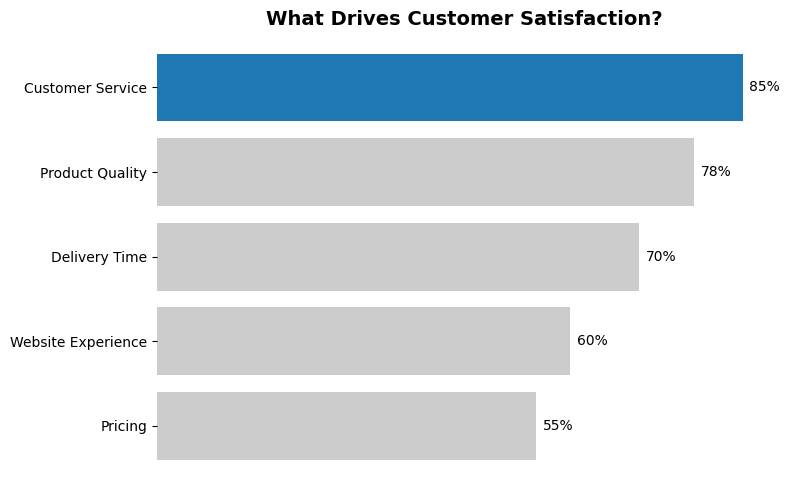

In [29]:
# Sample data to simulate the visual
categories = ['Customer Service', 'Product Quality', 'Delivery Time', 'Website Experience', 'Pricing']
scores = [85, 78, 70, 60, 55]

# Define colors and emphasize the top performer
colors = ['#cccccc'] * len(scores)
highlight_index = scores.index(max(scores))
colors[highlight_index] = '#1f77b4'  # Use a distinct blue

# Create horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(categories, scores, color=colors)

# Add text labels
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}%', va='center')

# Style adjustments
plt.gca().invert_yaxis()  # Highest value on top
plt.title('What Drives Customer Satisfaction?', fontsize=14, weight='bold')
plt.xticks([])  # Remove x-axis ticks
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.box(False)

plt.tight_layout()
plt.show()